In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/MyDrive/OS Collected Data/sample/Training'
test_dir = '/content/drive/MyDrive/OS Collected Data/sample/Testing'

img_width, img_height = 150, 150

batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1557 images belonging to 3 classes.
Found 390 images belonging to 3 classes.


In [ ]:
# VGG16 Model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

base_model.trainable = False

vgg_model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

vgg_model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
vgg_history = vgg_model.fit(
    train_generator,
    epochs=10,
    callbacks=[EarlyStopping(monitor='loss', patience=3)]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 495s 10s/step - accuracy: 0.4710 - loss: 2.0495
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 436s 9s/step - accuracy: 0.5988 - loss: 0.8513
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 427s 9s/step - accuracy: 0.6590 - loss: 0.7477
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 438s 9s/step - accuracy: 0.6510 - loss: 0.7299
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 430s 9s/step - accuracy: 0.6620 - loss: 0.7460
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 455s 9s/step - accuracy: 0.6463 - loss: 0.7445
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 429s 9s/step - accuracy: 0.6379 - loss: 0.7476


In [ ]:
test_loss, test_acc = vgg_model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 138s 10s/step - accuracy: 0.7801 - loss: 0.6241
Test accuracy: 0.7512820363044739


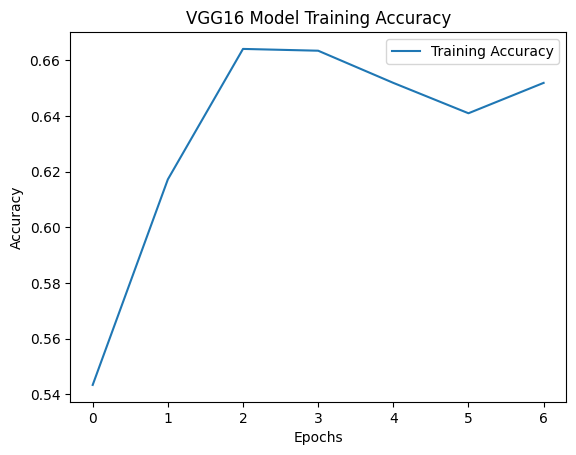

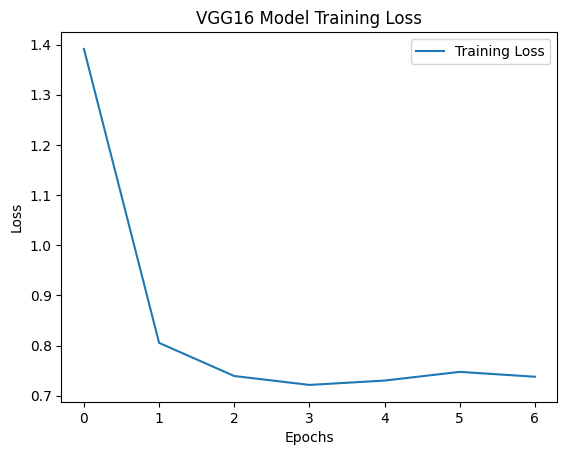

13/13 ━━━━━━━━━━━━━━━━━━━━ 111s 8s/step - accuracy: 0.7284 - loss: 0.6804
Test Loss: 0.6310458779335022
Test Accuracy: 0.7512820363044739


In [ ]:
# Plot VGG16 history
def plot_vgg_history(history, model, test_data):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('VGG16 Model Training Accuracy')
    plt.show()

    plt.plot(history.history['loss'], label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('VGG16 Model Training Loss')
    plt.show()

    test_loss, test_accuracy = model.evaluate(test_data)
    print(f"Test Loss: {test_loss}")
    print(f"Test Accuracy: {test_accuracy}")

plot_vgg_history(vgg_history, vgg_model, test_generator)

13/13 ━━━━━━━━━━━━━━━━━━━━ 107s 8s/step


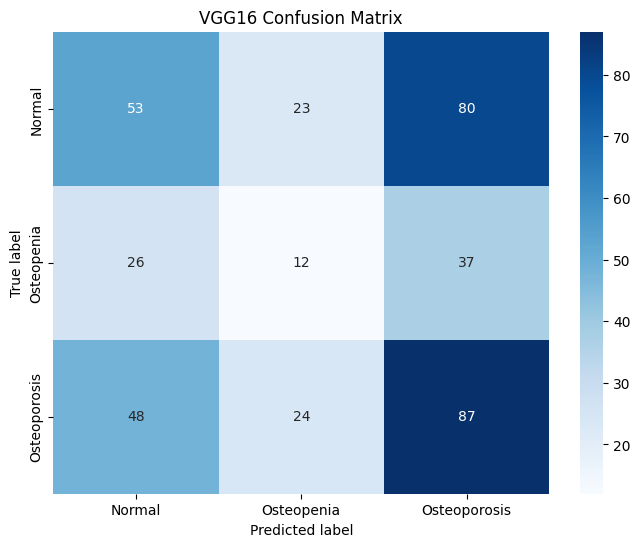

VGG16 F1 Score: 0.37968924938542


In [ ]:
# Predictions
y_true = test_generator.classes
y_pred = np.argmax(vgg_model.predict(test_generator), axis=-1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('VGG16 Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

f1 = f1_score(y_true, y_pred, average='weighted')
print(f"VGG16 F1 Score: {f1}")